In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ckdisease/kidney_disease.csv


# **Notebook Outline:**
#### 1. Project Topic
#### 2. Data Overview
#### 3. Data Cleaning
#### 4. Exploratory Data Analysis
#### 5. Models: Build, Results, Analysis
#### 6. Discussion
#### 7. Sources

# **Project Topic:** 
## **Title**: 
Predicting Chronic Kidney Disease Using Supervised Machine Learning Classification Techniques 
## **Overview**: 
For this project, I will use Logistic Regression, Decision Tree Classifier, and a Random Forest Classifier to perform binary classification for predicting chronic kidney disease and compare the performance of the different models.
## **Motivation:**
This project has important health impacts for the future diagnosis and treatment of Chronic Kidney Disease (CKD). The kidneys' role in the human body is to fiter waste products and prevent waste accumulation in the system. Chronic Kidney Disease is when a kidney can no longer filter the waste as expected. In the United States alone, 37 million people (or 15% of the population) is estimated to have CKD (https://www.cdc.gov/kidneydisease/publications-resources/ckd-national-facts.html). Furthermore, as many as 9 in every 10 adults with Chronic Kidney Disease (CKD) do not know that they have CKD (https://www.cdc.gov/kidneydisease/publications-resources/ckd-national-facts.html). For these reasons, with CKD being a relatively common health issue and with many sufferers being unaware of the illness, it is important to have methods to diagnose instances of CKD in new patients. By training models to recognize instances of the disease we offer a simple way for future individuals to be diagnosed. 
On a personal level, this project is very important to me since I was diagnosed with CKD at the age of 16 after falling ill unexpectedly. Until I arrived at the hospital I was unaware that I had CKD. I chose this project so that I can personally better understand predictors of the illness as well as work on a topic that impacts a large number of other individuals. 

# **Data Set Description**
## **Source**:
This dataset is originally from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease). 
    
>     Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of
    Information and Computer Science.
    
I am using the dataset uploaded on kaggle here:
>     Iqbal, M. (2017, April 13). Chronic kidney disease dataset. Kaggle. Retrieved August 6, 2022, from https://www.kaggle.com/datasets/mansoordaku/ckdisease

## **Data Description**
The dataset contains information collected on individuals who presented at a hospital in India over a 2 month period. The data set has 400 instances, 25 attributes, and contains missing values. The following features compose the dataset (from the data description of the data set on the UCI webpage (https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease#)):
* age - Age
* bp - Blood Pressure
* sg - Specific Gravity
* al - Albumin
* su - Sugar
* rbc - Red Blood Cells
* pc -  pus cell
* pcc - pus cell clumps
* ba - bacteria
* bgr - blood glucose random
* bu - blood urea
* sc - serum creatinine
* sod - sodium
* pot - potassium
* hemo - hemoglobin
* pcv - packed cell volume 
* wc - white blood cell count 
* rc - red blood cell count
* htn - hypertension
* dm - diabetes mellitus
* cad - coronary artery disease
* pe - pedal edema
* ane -anemia
* classification - class

The "classification" is the target variable indicating whether the individual has CKD or does not have CKD, hence why the data set is well suited for a binary class classification model

In [2]:
# Importing all key libraries to complete the project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.utils import resample
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import missingno as msno
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# **Data Set Overview**
In this section, the data set will be examined. First, a high level overview of the data will be presented before delving further into the data to ensure that each observation is correctly considered.

In [3]:
ckd_data = pd.read_csv('/kaggle/input/ckdisease/kidney_disease.csv') #importing .csv file
ckd_data.info() #print a summary of the data set we will use in this project

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

* There are 400 total observations and 25 feature columns and 1 target column
* The informational summary displays the null count of the data set. It is evident that there are several instances of missing data that will need to be cleaned later. 
* **Classification** is our target variable and describes whether this entry is classified as having CKD or not having CKD. 

In [4]:
ckd_data.head() # examine the first 5 entries of the data.

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


Within the dataset, there are both numerical and categorical entries. There are 11 numeric and 14 categorical feature types as well as a binary class target variable

# **Data Cleaning**

#### Overview: In this section, the data set will be prepared for use in the machine learning model. This requires several tasks:
1. Remove extraneous features
2. Check for a balanced data set
3. Examine data set for missing values 
    * Decide whether data set is eligible for Complete Case Analysis (CCA)
    * Remove features with too many NaNs
    * Impute any features with NaNs below a defined threshold
    

4. Any other data cleaning techniques that are appropriate for this particular data set. 

## 1.  Remove Extraneous Features
ID is a redundant feature that needs to be removed, as it is a number assigned to the patient entry and is not used in prediction.

In [5]:
ckd_data.drop('id', axis = 1, inplace = True) # drop the ID column
ckd_data.info() #show that the id column has been dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

## 2. Check For Balanced Data Set
First, list the classes for the target variable:

In [6]:
ckd_data.classification.unique() #Taking a closer look at what the Classification instances look like

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

Based on the examination above, there is a typo in the dataset, incorrectly coding "ckd" as both "ckd" and "ckd\t." This needs to be fixed before the data set can be checked for class imbalance.

In [7]:
ckd_data.classification = ckd_data.classification.replace('ckd\t', 'ckd') #here we replace every instance of ckd\t with ckd
ckd_data.classification.unique() #verify that replacement was successful

array(['ckd', 'notckd'], dtype=object)

We will now determine if the data set is balanced or unbalanced by comparing the number of observations with "CKD" vs number of observations with "Not CKD"

<AxesSubplot:title={'center':'Count of CKD vs Not CKD'}>

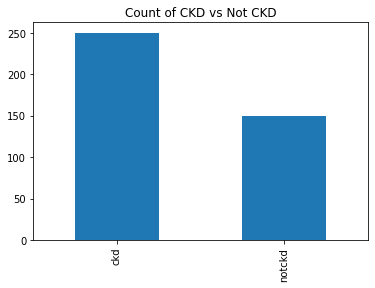

In [8]:
classification_counts = ckd_data['classification'].value_counts() #count how many instances of CKD vs not CKD
plt.figure()
classification_counts.plot(kind='bar', title = 'Count of CKD vs Not CKD') #bar plot of these instances 

The above plot demonstrates that the data set is imbalanced, with more instances of CKD in the dataset than instances of NOT CKD. To solve this issue, we can **oversample** the minority class, in this case the NOT CKD instances (Brownlee). The imbalanced data set will be addressed in the model build section of the project.

CKD and NOT CKD will now be encoded as 1 and 0 respectively for future use in the Machine Learning Models.

In [9]:
ckd_data['classification'].replace({'ckd':1, 'notckd':0}, inplace = True) # Since this is a binary class classification, we will encode CKD class as a "1" and Not CKD as "0"
ckd_data.classification.unique() #verify success of replacement

array([1, 0])

## 3. Handle missing values in the data set
#### In this section, entries with missing values will be examined. The features with many missing values will either be imputed or dropped.

In [10]:
nulls = ckd_data.isnull().sum() #Count how many nulls there are in the each feature

In [11]:
percent_nulls = nulls / ckd_data.shape[0] * 100 # Determine the percent of each feature with nulls
print(percent_nulls)

age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64


<AxesSubplot:>

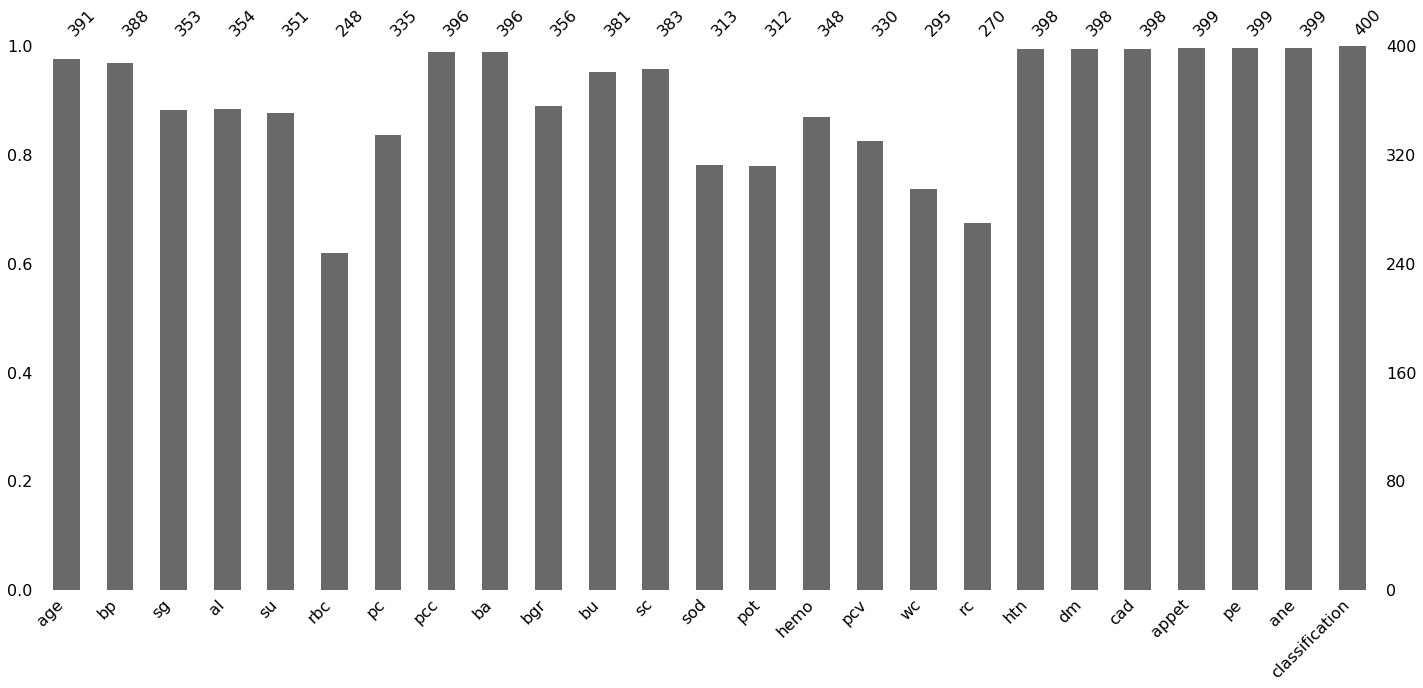

In [12]:
msno.bar(ckd_data) #bar plot to demonstrate the missing values (out of the 400 total observations)

If there had been no nulls, each bar plot entry above would have a value of 400. However, as seen above, there are numerous nulls that will need to be dealt with.

Text(0.5, 0, 'Null Count')

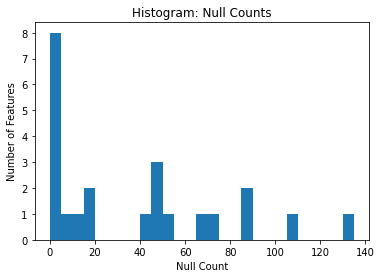

In [13]:
nulls = ckd_data.isnull().sum(axis=0) #count the number of nulls so that a histogram can be plotted
null_counts = nulls[nulls>0] #only plot the existing nulls 

bin_width = 5
histogram = plt.hist(null_counts, bins = np.arange(0, 140, bin_width))
plt.title('Histogram: Null Counts')
plt.ylabel('Number of Features')
plt.xlabel('Null Count')

* #### The data set is not suitable for Complete Case Analysis (CCA) since there are more than 5% of the total observations that have null values. The next step is to examine each feature and determine which to impute and which to drop. CCA was introduced in Programming Assignment I of this course.

* #### Any feature with more than 15% of the observations with missing values will be removed, the rest will be imputed. This is because we do not want to remove all of our features (thus losing possible influencers on our prediction, but it is not reasonable to impute above a certain threshold given that additional bias will be introduced) Selecting 15% as the threshold keeps as many features as possible (to account for their influence in the model) while also removing those that have a number of nulls that if imputed would bias the model.

Next, determine which features fall into the category of imputation versus those that need to be removed from the dataset:

In [14]:
# this will calc which features have nulls (ie need to be cleaned) but have less than 15% of observations missing
features_to_impute = ckd_data.columns[(ckd_data.isnull().sum()/len(ckd_data)<0.15)] & ckd_data.columns[(ckd_data.isnull().sum()/len(ckd_data)>0)] 
# this will calc which features have more than 105 of observations missing and need to be thrown away
features_to_throw = ckd_data.columns[(ckd_data.isnull().sum()/len(ckd_data))>=0.15] 

print(len(features_to_impute), features_to_impute)
print(len(features_to_throw), features_to_throw)

17 Index(['age', 'bp', 'sg', 'al', 'su', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'hemo',
       'htn', 'dm', 'cad', 'appet', 'pe', 'ane'],
      dtype='object')
7 Index(['rbc', 'pc', 'sod', 'pot', 'pcv', 'wc', 'rc'], dtype='object')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  


Based on the information above, 17 features will need to be imputed (treated to replace the missing values) and 7 features will need to be removed.

Now, use the "features to throw" above to get rid of any features with too many missing values:

In [15]:
clean_ckd = ckd_data.drop(features_to_throw, axis=1) #remove the "features to throw", ie those with more than 15% of entries missing
clean_ckd.info() #print out new data frame summary with the removed features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   pcc             396 non-null    object 
 6   ba              396 non-null    object 
 7   bgr             356 non-null    float64
 8   bu              381 non-null    float64
 9   sc              383 non-null    float64
 10  hemo            348 non-null    float64
 11  htn             398 non-null    object 
 12  dm              398 non-null    object 
 13  cad             398 non-null    object 
 14  appet           399 non-null    object 
 15  pe              399 non-null    object 
 16  ane             399 non-null    object 
 17  classification  400 non-null    int

Now that the features with too many missing values have been removed, it is time to clean the data further by imputing the missing values in the "features to impute" list. The method of imputation will depend on the type of data. A categorical data type will be replaced with the most commonly occuring entry, while a numerical data type null will be replaced with the mode. 

In [16]:
for columns in clean_ckd.columns:
    print(columns, (clean_ckd[columns].unique()), clean_ckd[columns].dtype) #examining the unique values within the dataset before continuing

age [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] float64
bp [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] float64
sg [1.02  1.01  1.005 1.015   nan 1.025] float64
al [ 1.  4.  2.  3.  0. nan  5.] float64
su [ 0.  3.  4.  1. nan  2.  5.] float64
pcc ['notpresent' 'present' nan] object
ba ['notpresent' 'present' nan] object
bgr [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  

As is evident, some of the features have some typos and will need to be cleaned before continuing with imputation.

In [17]:
# Replace DM errors 
clean_ckd.dm = clean_ckd.dm.replace(' yes', 'yes') #here we replace every instance of yes with an extra space with yes
clean_ckd.dm = clean_ckd.dm.replace('\tyes', 'yes') # fixing another error
clean_ckd.dm = clean_ckd.dm.replace('\tno', 'no')
print('dm',clean_ckd.dm.unique()) #verify that replacement was successful

#Replace CAD errors
clean_ckd.cad = clean_ckd.cad.replace('\tno', 'no')
print('cad', clean_ckd.dm.unique())

dm ['yes' 'no' nan]
cad ['yes' 'no' nan]


Now that we have replaced the typos, we will encode each categorical variable with a binary 0/1 (as we did with the classification target variable) for ease of data analysis

In [18]:
clean_ckd['htn'].replace({'yes':1, 'no':0}, inplace = True)
clean_ckd['dm'].replace({'yes':1, 'no':0}, inplace = True)
clean_ckd['cad'].replace({'yes':1, 'no':0}, inplace = True)
clean_ckd['appet'].replace({'good':1, 'poor':0}, inplace = True)
clean_ckd['ane'].replace({'yes':1, 'no':0}, inplace = True)
clean_ckd['pe'].replace({'yes':1, 'no':0}, inplace = True)
clean_ckd['ba'].replace({'present':1, 'notpresent':0}, inplace = True)
clean_ckd['pcc'].replace({'present':1, 'notpresent':0}, inplace = True)
clean_ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   pcc             396 non-null    float64
 6   ba              396 non-null    float64
 7   bgr             356 non-null    float64
 8   bu              381 non-null    float64
 9   sc              383 non-null    float64
 10  hemo            348 non-null    float64
 11  htn             398 non-null    float64
 12  dm              398 non-null    float64
 13  cad             398 non-null    float64
 14  appet           399 non-null    float64
 15  pe              399 non-null    float64
 16  ane             399 non-null    float64
 17  classification  400 non-null    int

Finally, we will replace nulls. For any categorical variable, we will use the mode to 

In [19]:
clean_ckd['age'].fillna(clean_ckd['age'].mean(),inplace =True)
clean_ckd['bp'].fillna(clean_ckd['bp'].mean(),inplace =True)
clean_ckd['sg'].fillna(clean_ckd['sg'].mean(),inplace =True)
clean_ckd['al'].fillna(clean_ckd['al'].mean(),inplace =True)
clean_ckd['su'].fillna(clean_ckd['su'].mean(),inplace =True)
clean_ckd['pcc'].fillna(clean_ckd['pcc'].mode()[0],inplace =True)
clean_ckd['ba'].fillna(clean_ckd['ba'].mode()[0],inplace =True)
clean_ckd['bgr'].fillna(clean_ckd['bgr'].mean(),inplace =True)
clean_ckd['bu'].fillna(clean_ckd['bu'].mean(),inplace =True)
clean_ckd['sc'].fillna(clean_ckd['sc'].mean(),inplace =True)
clean_ckd['hemo'].fillna(clean_ckd['ba'].mean(),inplace =True)
clean_ckd['htn'].fillna(clean_ckd['htn'].mode()[0],inplace =True)
clean_ckd['dm'].fillna(clean_ckd['dm'].mode()[0],inplace =True)
clean_ckd['cad'].fillna(clean_ckd['cad'].mode()[0],inplace =True)
clean_ckd['appet'].fillna(clean_ckd['appet'].mode()[0],inplace =True)
clean_ckd['pe'].fillna(clean_ckd['pe'].mode()[0],inplace =True)
clean_ckd['ane'].fillna(clean_ckd['ane'].mode()[0],inplace =True)

In [20]:
clean_ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   pcc             400 non-null    float64
 6   ba              400 non-null    float64
 7   bgr             400 non-null    float64
 8   bu              400 non-null    float64
 9   sc              400 non-null    float64
 10  hemo            400 non-null    float64
 11  htn             400 non-null    float64
 12  dm              400 non-null    float64
 13  cad             400 non-null    float64
 14  appet           400 non-null    float64
 15  pe              400 non-null    float64
 16  ane             400 non-null    float64
 17  classification  400 non-null    int

#### There are no longer any nulls in the data set! The data is ready to move to the Exploratory Data Analysis Phase.

### Discussion of Data Cleaning Results: 
In this section, the data set was closely examined, cleaned, and prepped for future model training.
* **Extraneous Features:** "ID" was removed since it did not offer any additional information about the patient and was meant as a numerical patient identifier number not a variable in the data set. 
* **Imbalance:** As was evident above, this data set was imbalanced, with 150 instances of NOT CKD and 250 instances of CKD. This issue will be addressed in the model build section by oversampling the minority class of the training data set. This is a strategy used in machine learning to address imbalanced (and small size data sets)
* **Missing Features:** The data set had a number of missing values and was not suitable for complete case analysis. Each feature with nulls was considered for imputation or removal based on a 15% null value threshold. As a result, seven features were removed and 17 features were imputed (although some had < 1% of nulls). The features were imputated using the mean value if the feature was numerical and mode if the feature was categorical. Imputation was the ideal choice over complete removal over each feature containing nulls, as it is important to maintain as many features as possible to understand the impact each feature has on the target variable. If we removed all features with nulls, there is the risk of having removed features that are contributors to the final classification decision. To account for the imputations, the models will be evaluated with K-Fold Cross Validation.
* **Encoding:** There were several categorical features that were encoded to 0/1 since machine learning models need numerical values instead of categorical ones.

Ultimately, a combination of tables and plots were used as the visualizations to thoroughly examine the data set. In addition to removing missing features, this section also changed the features values to a binary category (in place of words) further polishing the data set and prepping for the next steps.

# Exploratory Data Analysis (EDA)
Now that the data has been cleaned, the next step is to examine any correlation, collinearity, and other feature traits that could impact the results of our model.

#### Overview: In this section, the data set will be explored via EDA. This requires several tasks:
1. Checking for Correlation
2. Checking for Collinearity (additional statistical test)
3. Box Plots: Outliers and Data Distribution
4. Histograms: Skewness
5. Discussion of Findings

## 1. Checking for Correlation 

<AxesSubplot:>

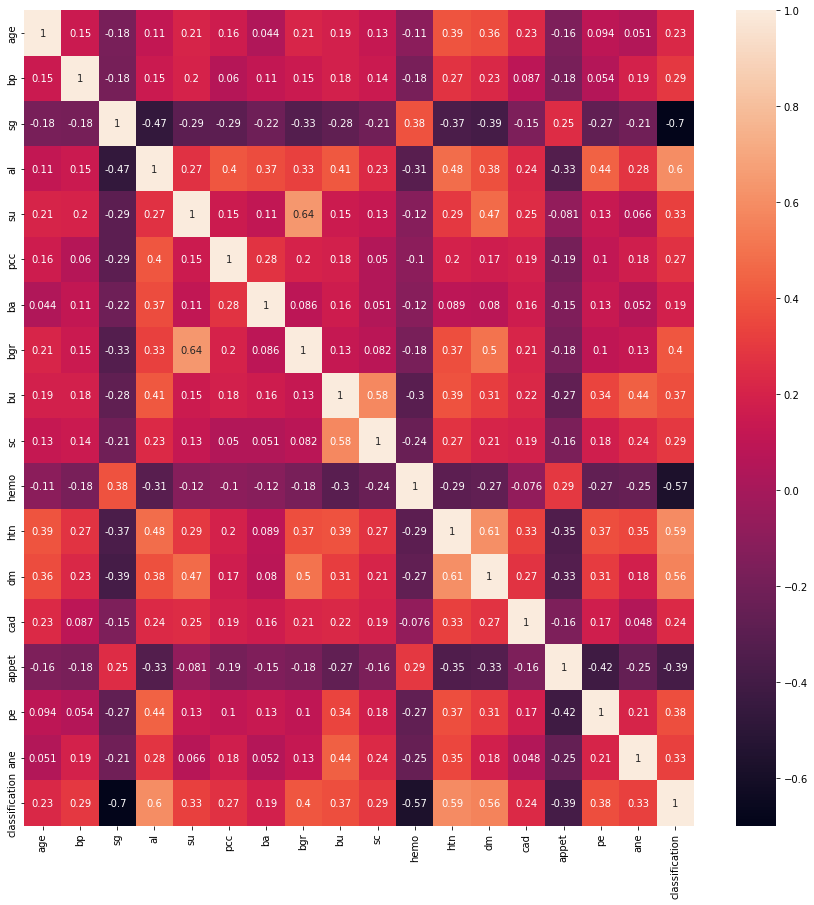

In [21]:
plt.figure(figsize = (15, 15))
sns.heatmap(clean_ckd.corr(), annot = True)

The heatmap of the correlation matrix displays the relationship between features in the model. The values in a heatmap range from -1 to 1 with 0 indicating that the two variables in question do not have a strong linear relationship. As is evident in the diagonal row, each feature is strongly correlated to itself. 

It is important to examine this plot for any correlation between two features in the model. A negative number indicates a negative correlation between the variables (for example,the relationship between Specific Gravity (sg) and Albumin (al) at -0.47). 

A positive number indicates a positive correlation between two variables (for example, the relationship between Sugar (su) and Blood Glucose Random (bgr) at 0.64). This means that as the value for sugar increases the value for blood glucose random will also increase. These two features both measure sugar, one in urine and one in a blood sample. Despite both being measures of sugar, the correlation is still only 0.64, so neither feature will be removed to prevent information loss. We will re-evaluate this decision in the model section where feature importance will be quantified and some features will be dropped).

The feature will the lowest correlation to Classification (the target variable) is Bacteria (Ba) with a value of 0.19.

## 2. Checking for Collinearity

In [22]:
X = add_constant(clean_ckd) # need a constant in order to perform the VIF (acts as the baseline)
X.drop('classification', axis = 1, inplace = True) # drop the target variable to only examine the collinearity between features 
VIF = pd.DataFrame() #create a dataframe to contain the information
VIF["feature"] = X.columns #set columns of VIF to be the features
VIF["VIF"] = [variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])] # calc the VIF for each feature 
print(VIF)

   feature           VIF
0    const  55649.698488
1      age      1.296185
2       bp      1.160811
3       sg      1.538183
4       al      2.080479
5       su      1.899380
6      pcc      1.312250
7       ba      1.239942
8      bgr      1.989178
9       bu      2.036582
10      sc      1.568016
11    hemo      1.325201
12     htn      2.230852
13      dm      2.110187
14     cad      1.229655
15   appet      1.402793
16      pe      1.520701
17     ane      1.395784


The Variable Influence Factor (VIF) indicates the collinearity of one feature with another. A lower value (~1) indicates that there is no collinearity (or minimal collinearity) for that feature. A value greater than one and less than five indicates mild collinearity and a value greater than five indicates strong collinearity  (source: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/). As is evident from the table above, no feature exhibits strong collinearity and all values are about 2 or less. Therefore, no features will be removed.

## 3. Box Plots: Outliers and Data Distribution

Now we will look at some boxplots of interest. I have chosen to look at a subset of the total features (i.e. those with numerical values) since these will yield more insight than the binary encoded categorical feature values.

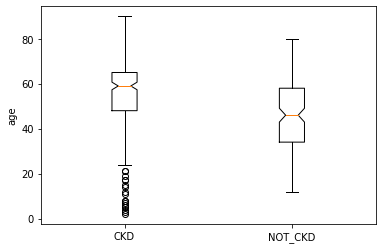

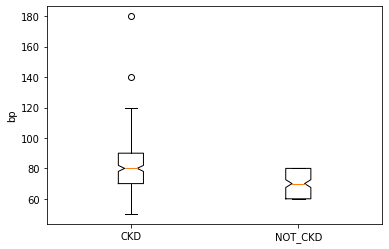

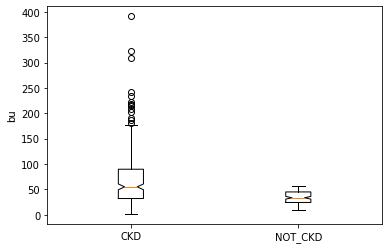

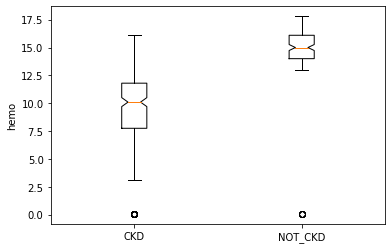

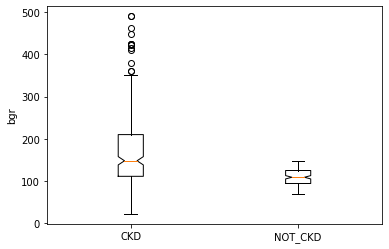

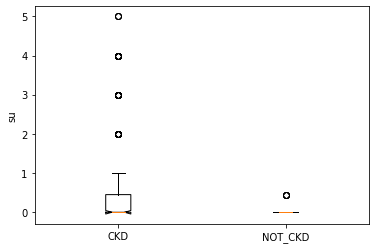

In [23]:
box_plot_features = ['age', 'bp', 'bu', 'hemo', 'bgr', 'su'] #specific subset of features for the boxplots.
for c in box_plot_features: # plotting distribution of data for ckd vs not_ckd to understand how data distribution changes.
    CKD = clean_ckd[clean_ckd['classification']== 1][c] #split into CKD instances
    NOT_CKD = clean_ckd[clean_ckd['classification']== 0][c] #get the NOT CKD instances to compare the two distributions
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot([CKD, NOT_CKD], notch = True, labels = ['CKD', 'NOT_CKD'])
    plt.ylabel(c)

The above box plots compare the distribution of instances of kidney disease vs not kidney disease. It is evident that the data is distributed differently between CKD and not CKD. For the CKD instances, the data distribution is more variable (evidenced by the larger boxes) and there are more outliers. These outliers could be indicative of a disease (i.e. CKD) and therefore should remain in the data set. 

## 4. Histograms: 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'sg'}>,
        <AxesSubplot:title={'center':'al'}>],
       [<AxesSubplot:title={'center':'su'}>,
        <AxesSubplot:title={'center':'pcc'}>,
        <AxesSubplot:title={'center':'ba'}>,
        <AxesSubplot:title={'center':'bgr'}>],
       [<AxesSubplot:title={'center':'bu'}>,
        <AxesSubplot:title={'center':'sc'}>,
        <AxesSubplot:title={'center':'hemo'}>,
        <AxesSubplot:title={'center':'htn'}>],
       [<AxesSubplot:title={'center':'dm'}>,
        <AxesSubplot:title={'center':'cad'}>,
        <AxesSubplot:title={'center':'appet'}>,
        <AxesSubplot:title={'center':'pe'}>],
       [<AxesSubplot:title={'center':'ane'}>,
        <AxesSubplot:title={'center':'classification'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

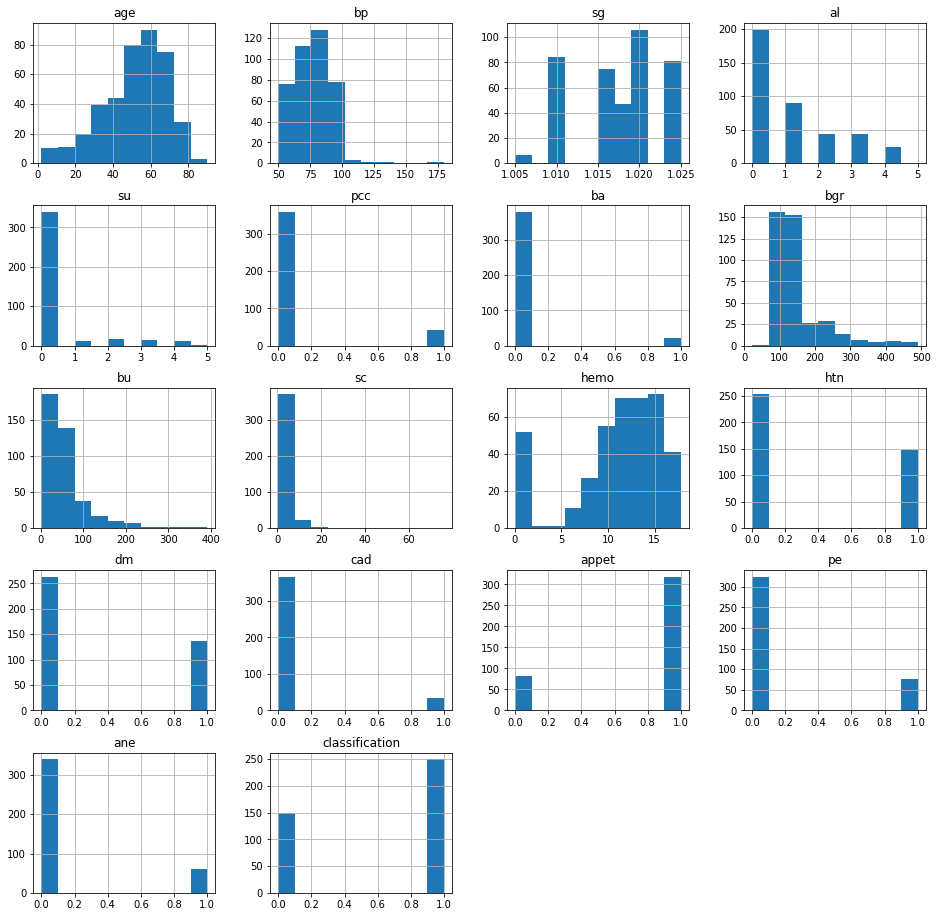

In [24]:
clean_ckd.hist(figsize = (16, 16)) #plot histogram of each feature

The histograms show that the distribution of each feature is different. Age is slightly right skewed, indicating more older patients were observed than younger patients. Blood Pressure (bp) is slightly left skewed, with more patients having low bp than high bp. There are a total of 13 features that are left skewed and 4 features that are right skewed as well as one feature that is randomly distributed. The skewness in the data set could impact machine learning model performance for some models types and will need to be taken into consideration when building and evaluating the machine learning models. For this reason, it will be interesting to compare the performance of parametric vs non parametric machine learning models on the data set. Given the skewed dataset, it is expected that the non parametric model (SVM or Random Forest) would outperform a parametric model (logistic regression) since the latter makes assumptions about the fit function and therefore expects a certain format while the non parametric do not make assumptions about the data (James et. al., 22).

## 5. Discussion of Exploratory Data Analysis Findings: 
In this section, the data set closely explored and any data set traits were considered before progressing to building the machine learning models.
* **Correlation:** The correlation matrix visually demonstrates the relationship between features and between features and the target variable. As was discussed above, some features are correlated, however, no features were completely correlated (1 or -1). The feature importance will be addressed in the next section and the results of the correlation matrix will be revisited. Overall, the results of the correlation matrix show there is some correlation between features, which is to be expected since the features are all medical measures of bodily function and some are measures of the same type but at different steps in the bodily process (for example sugar is measured from a urine sample while blood glucose random is a measure of sugar in the blood.  
* **Collinearity:** An extra statistical test called the Variable Influence Factor (VIF) was conducted to further explore the data set. This statistical test is a measure of collinearity and values above a "5" are considered to have strong collinearity. Since none of the features in the data set had a value above the threshold, no features will be removed from the dataset as a result of collinearity.
* **Outliers and Data Distribution:** The above boxplots explored the distribution of several numerical features to further explore the data set. Furthermore, the data set was divided into instances of CKD and instances of NOT CKD to compare the distributions and outliers in the data set. Upon inspection, there were outliers present in the CKD group, however, since these outliers could be strong indicators of abnormal body function (i.e. a serious disease or illness) they will not be removed.
* **Histograms** The histograms for the features showed that some of the data set features are skewed. This is a good opportunity to compare parametric vs non parametric binary classification machine learning models. It is expected that a non parametric model would outperform a parametric model since the former does not make assumptions about the fit function while the latter expects a certain function format (James et. al., 22). 

A combination of visualizations (tables, plots, heatmaps) was used to further explore the data set. Now that the data set has been completely examined and cleaned, we can move on to the model build.

# **Models**

#### Overview: In this section, the data set will be used to build several machine learning models. This section includes:
1. Splitting the Data Set
2. Addressing Class Imbalance
3. Logistic Regression
    * Baseline Case
    * Optimization via Feature Importance
    * Results and Analysis
4. Decision Tree Classifier
    * Baseline Case
    * Optimization & K-Fold Cross Validation
    * Results and Analysis
5. Random Forest Classifier
    * Baseline Case
    * Optimization & K-Fold Cross Validation
    * Results and Analysis
6. Comparison of Models

#### **Model Selection**:
The models listed above were chosen in careful consideration of the dataset and type of problem at hand. Since this is a binary class classification problem, the suitable models are Classification models. Furthermore, given the size of the data set and number of features, Logistic Regression, Decision Tree Classifier, and Random Forest Classification were all suitable choices for answering the question.

#### **Feature Engineering**:
In the section on Data Cleaning, the features were all one hot encoded from their categorical labels to binary 0 and 1. Feature selection based on feature importance will be used to optimize the logistic regression model since there are no hyperparameters in logistic regression.

#### **Collinearity**:
In the Exploratory Data Analysis section, VIF statistical analysis was used to address any potential collinearity/interation. As discussed above, the data set demonstrates mild collinearity and so no features will be removed before proceeding with the model. It is important to note that collinearity would have an impact on logistic regression and support vector machine while random forest is robust against collinearity due to the sampling methods used to build the model.

#### **Performance Metrics**:
Since the dataset is imbalanced, accuracy is not the best choice for evaluating model performance. The models will be evaluated and optimized using the f1 score (since this is a good metric for an imbalanced dataset). The f1 score is a single score that represents both the precision and recall of a model. The final models will be evaluated based on f1 score and confusion matrix to have a comprehensive comparison amongst models. The confusion matrix is important for a classification problem in the medical field since the number of false negatives needs to be carefully considered so as to avoid missing a possible diagnosis.


## 1. Splitting the Data Set
The data set will be split into 60% train, 20% test, and 20% validation. We will use the validation data set to perform K-Fold Cross Validation to mitigate the effects of the imputations and the imbalanced data set discussed in the above section on data cleaning.

In [25]:
y = clean_ckd['classification'].values # y values will be the "labels" which in this data set are CKD (1) or NOT CKD (0).
X = clean_ckd.drop('classification', axis = 1).values # the features and observations are the x values that want to predict the y label
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50) # first split into test and train
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25, random_state = 50) #then further split the test data to get validation data set

print('train:', x_train.shape,'test:', x_test.shape, 'val:', x_val.shape)

train: (240, 17) test: (80, 17) val: (80, 17)


## 2. Addressing Class Imbalance

As was evident in the EDA, there is a class imbalance in this data set. In order to appropriately handle the imbalance, the **training** data set's minority class will be oversampled. Oversampled means that the minority class, in this case NOT CKD, will duplicate instances of observations in order to have the same class number as the majority data class. The oversampling occurs on the training data set only so that the test data set remains unaffected.

In [26]:
ros = RandomOverSampler(random_state=12)
x_train, y_train = ros.fit_resample(x_train, y_train) #oversampling of the minority class so that it is the same size as the majority class

## 3. Logistic Regression
* ### Baseline Case: 
The following model is built with no optimization and will be used to compare to the model after optimization and K fold cross validation has been completed.

In [27]:
# Baseline Case for Logistic Regression
log_reg = LogisticRegression(solver = 'liblinear', class_weight = 'balanced').fit(x_train, y_train) #choose balanced as the class weight since the data set is imbalanced
y_pred = log_reg.predict(x_train) 
yhat = log_reg.predict(x_test)
print(classification_report(y_test, yhat)) #generate a report for all metrics
log_reg_f1 = f1_score(y_test, yhat) #save the f1 score for later model comparison/evaluation
print('f1:', log_reg_f1)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.98      0.92      0.95        59

    accuracy                           0.93        80
   macro avg       0.89      0.93      0.91        80
weighted avg       0.93      0.93      0.93        80

f1: 0.9473684210526316


The f1 metric for the test data set is 0.947. This is already a strong score, but we can try to improve it further by considering feature importance and cross validation.
* ### Optimization (Feature Engineering):
As discussed in lecture, there is no hyperparameter for a logistic regression model. However, optimization can occur through feature importance and feature selection (a part of feature engineering). This section will use the coefficients generated above to evaluate each feature's importance in the model. This will inform if any features can be removed from the model to improve performance. 

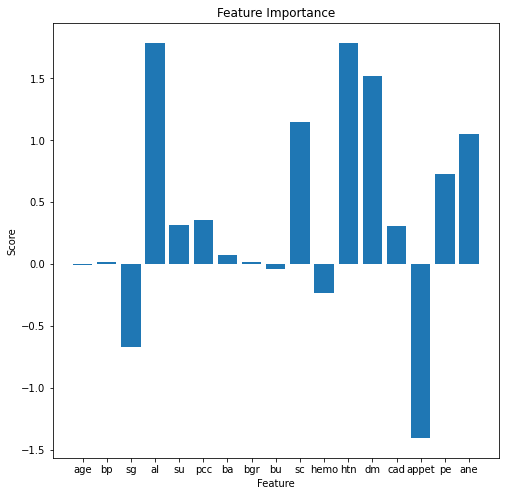

In [28]:
feature_importance = log_reg.coef_[0] #from the logistic regression model we can get the coefficients for each feature
features = clean_ckd.drop('classification', axis = 1) #remove the target feature from consideration
plt.figure(figsize = (8,8))
plt.bar([c for c in features.columns], feature_importance) #bar plot to visually display feature importance
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Importance')
plt.show()

The plot above demonstrates that there are several features that do not have a strong influence on the target feature. We will remove the three lowest contributing features and evaluate model performance. The features removed are: age, blood pressure (bp), and blood glucose random (bgr). If you recall the correlation matrix heatmap from the EDA section, it was evident that there was correlation between sugar (su) and blood glucose random (bgr). Now that it has been confirmed that this feature has little impact on target feature prediction, we can remove bgr. 

In [29]:
x_train_drop= np.delete(x_train, [0, 1, 7], axis = 1) #remove the three features discussed above from the training set
x_test_drop= np.delete(x_test,[0,1,7], axis= 1) #remove the three features discussed above from the test set.

Now that the features with the lowest coefficients have been removed, a new logistic regression model will be fit using the training data set. It will also be evaluated for any improvement in f1 (recall) performance.

In [30]:
log_reg_new = LogisticRegression(solver = 'liblinear', class_weight = 'balanced').fit(x_train_drop, y_train) #fit a model with the updated x_train data set
y_pred_drop = log_reg_new.predict(x_train_drop)
yhat_drop = log_reg_new.predict(x_test_drop)
print(classification_report(y_test, yhat_drop)) #print all metrics 
log_reg_f1_drop = f1_score(y_test, yhat_drop) #store the f1 variable for future comparison
print('f1_features:', log_reg_f1_drop)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.98      0.93      0.96        59

    accuracy                           0.94        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.94      0.94        80

f1_features: 0.9565217391304348


By dropping the features, there f1 score improves from 94.7% to 95.6%. Now, we will confirm feature importance and iterate again by dropping additional features if necessary.

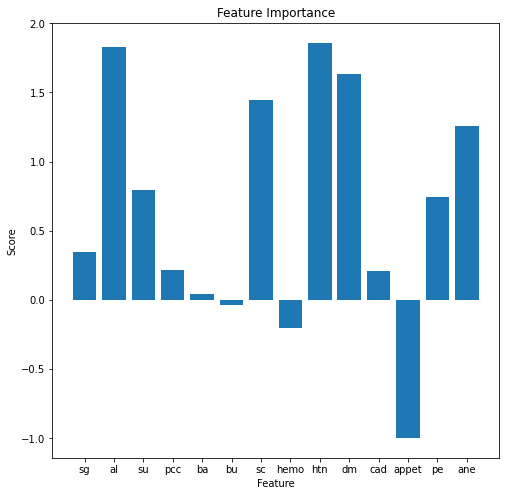

In [31]:
feature_importance_2 = log_reg_new.coef_[0] #from the logistic regression model we can get the coefficients for each feature
features_2 = clean_ckd.drop('classification', axis = 1)#remove the target feature from consideration
features_2.drop('age', axis = 1, inplace = True)
features_2.drop('bp', axis = 1, inplace = True)
features_2.drop('bgr' , axis = 1, inplace = True)#remove the target feature from consideration
plt.figure(figsize = (8,8))
plt.bar([c for c in features_2.columns], feature_importance_2) #bar plot to visually display feature importance
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Importance')
plt.show()

'Ba' and 'Bu' both have low feature importance relative to the rest of the features. Will drop these features and re-run the logistic regression model.

In [32]:
x_train_drop2= np.delete(x_train_drop, [4, 5], axis = 1) #remove the two features discussed above from the training set
x_test_drop2= np.delete(x_test_drop,[4, 5], axis= 1) #remove the two features discussed above from the test set.

In [33]:
log_reg_3 = LogisticRegression(solver = 'liblinear', class_weight = 'balanced').fit(x_train_drop2, y_train) #fit a model with the updated x_train data set
y_pred_drop2 = log_reg_3.predict(x_train_drop2)
yhat_drop2 = log_reg_3.predict(x_test_drop2)
print(classification_report(y_test, yhat_drop2)) #print all metrics 
log_reg_f1_drop2 = f1_score(y_test, yhat_drop2) #store the f1 variable for future comparison
print('f1_features:', log_reg_f1_drop2)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.98      0.93      0.96        59

    accuracy                           0.94        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.94      0.94        80

f1_features: 0.9565217391304348


Removing the additional features did not improve the model's performance. Next, we will use this feature set to perform 5 fold cross validation to confirm.

In [34]:
from sklearn.linear_model import LogisticRegressionCV
log_reg_cv = LogisticRegressionCV(cv=5, random_state=0, solver = 'liblinear', class_weight = 'balanced').fit(x_train, y_train)
predict_cv = log_reg_cv.predict(x_test)
print(classification_report(y_test, predict_cv))
log_reg_f1_cv = f1_score(y_test, predict_cv)
print('f1_cv:', log_reg_f1_cv)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.98      0.99        59

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80

f1_cv: 0.9914529914529915


Cross validation f1 score is 99.1%. This is an increase from the baseline model with 94.7%

* ### Analysis of Results: Logistic Regression
First, let's examine the confusion matrix for the cross validated model on the test data set.

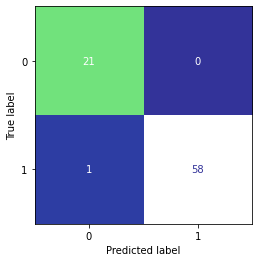

In [35]:
confusion_matrix_log_reg = confusion_matrix(y_test, predict_cv)
cm_plot_log_reg = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_log_reg)
cm_plot_log_reg.plot(cmap = 'terrain', colorbar =False)
plt.show()

The confusion matrix (of the model with feature engineering) shows that there are no false positives (instances where the individual does not have CKD but is labelled as having CKD). However, there is 1 instance of false negatives (where the individual is told they do **not** have CKD but they do have CKD). For the purposes of the model we want the minimize any false negatives since diagnosis of CKD is the focus of this model.

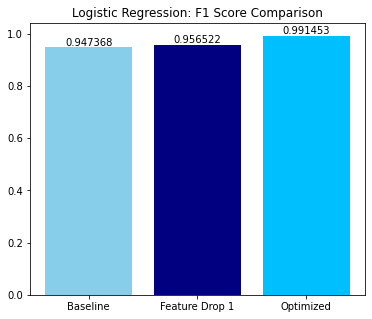

In [36]:
ml_model1 = ['Baseline','Feature Drop 1','Optimized']
f1_scores1 = [log_reg_f1, log_reg_f1_drop, log_reg_f1_cv]
c = ['skyblue', 'navy','deepskyblue']
fig, ax = plt.subplots(figsize=(6, 5))
bar_plot = ax.bar(ml_model1, f1_scores1, color = c) #plot each f1 score a specific color
ax.bar_label(bar_plot) #show the f1 score on the plot
plt.title('Logistic Regression: F1 Score Comparison')
plt.show()

The above plot demonstrates the performance improvement as the feature selection iteration is completed. The final optimized model demonstrates an improvement in performance over each previous model.

Text(0, 0.5, 'True Positive Rate')

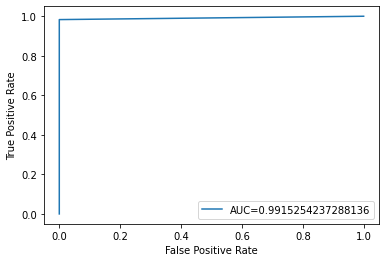

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, predict_cv)
auc_log_reg = roc_auc_score(y_test, predict_cv)
plt.plot(fpr, tpr, label = 'AUC='+str(auc_log_reg))
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

The shape of the ROC (Receiver Operator Curve) is ideal. Furthermore, the AUC performance exceeds that of 0.5, which is the point at which the model would be equivalent to making random classifications (since this is a binary classification problem the odds of predicting correctly at random is 0.5).

In this section, a baseline logistic model was built and fit to evaluate classification performance for predicting instances of chronic kidney disease (CKD). The baseline model showed strong performance in its f1 score (at 94.7%). The model performance was improved in two ways, first by evaluating feature performance and then by running 5-Fold Cross validation with the updated data set (features with little contribution were removed). The model f1 score improved from 94.7% to 99.1%. Ultimately, this is a strong model that performs well, however, it does label 1 instances in the testing data set with false negatives From a medical standpoint, this is not good, since false negatives allow patients to remain undiagnosed and potentially risk dangerous health consequences. This logisitic regression model has demonstrated the value in using feature engineering and iteration to optimize model performance.

## 4. Decision Tree Classifier
* ### Baseline Case: 
The following model is built with no optimization and will be used to compare to the model after optimization and K fold cross validation has been completed.

In [38]:
dtc = DecisionTreeClassifier().fit(x_train,y_train) #baseline DTC classifier
dtc_ytest = dtc.predict(x_test)
print(classification_report(y_test, dtc_ytest))
dtc_f1 = f1_score(y_test, dtc_ytest)
print('f1:', dtc_f1)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.98      1.00      0.99        59

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80

f1: 0.9915966386554621


The base case of the Decision Tree Classifier model has a F1 score on the test data of 99.1%. This baseline case of the decision tree classifier outperforms the logistic regression model discussed above, but additional hyperparameter optimization can be used to further improve performance. The F1 Score is used since this is an imbalanced data set.

### Optimization and Cross Validation:

* Now, we will use Cross Validation and optimization of several hyperparameters to improve model performance. The different loss criterion for deciding tree split and the maximum number of features considered will be explored.

In [39]:
params_dtc = param_grid = {  
    'criterion' :['gini', 'entropy'], 
    'max_features' : ['auto', 'sqrt', 'log2']} #dictionary for all parameters that will form the tradespace.
dtc_cv = DecisionTreeClassifier()
dtc_grid = GridSearchCV(dtc_cv,params_dtc,cv=5, scoring = 'f1') # setting up a grid search 
dtc_grid.fit(x_val, y_val) #fitting each grid search product with the validation dataset
print("Best F1 score: ", dtc_grid.best_score_)
print("Best hyperparameters: ", dtc_grid.best_params_)

Best F1 score:  0.9510058568882098
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'log2'}


In [40]:
opt_dtc= DecisionTreeClassifier(criterion = 'entropy', max_features=  'auto') #use the features identified as the best hyperparameters for the optimized model
opt_dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='auto')

In [41]:
dtc_u_ypred = opt_dtc.predict(x_train) #predict with the optimized model
dtc_u_yhat = opt_dtc.predict(x_test)
print(classification_report(y_test, dtc_u_yhat))
dtc_u_f1 = f1_score(y_test, dtc_u_yhat) #get f1 score for the optimized model
print('F1 score:', dtc_u_f1)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.98      0.98      0.98        59

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

F1 score: 0.9830508474576272


* ### Analysis of Results: Decision Tree Classifier
In this section, a baseline decision tree model was built and fit to evaluate classification performance for predicting instances of chronic kidney disease (CKD). The baseline model showed strong performance in its f1 score (at 99.1%). The model performance was improved using hyperparameter optimization. The model f1 score improved from 99.1% to 100%. Ultimately, this is a strong model that performs well, and the final optimized model does not produce any false negatives in the test data set. 

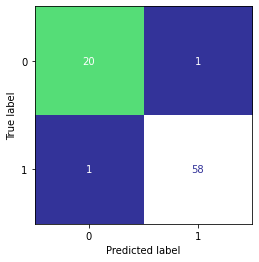

In [42]:
confusion_matrix_dtc = confusion_matrix(y_test, dtc_u_yhat)
cm_plot_dtc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dtc)
cm_plot_dtc.plot(cmap = 'terrain', colorbar =False)
plt.show()

As is evident, this model correctly classifies each instance in the test data set and has no false negatives or false positives. This is desirable, especially for a model used for medical purposes.

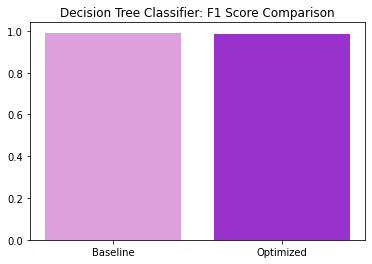

In [43]:
ml_models = ['Baseline','Optimized']
f1_scores = [dtc_f1, dtc_u_f1]
c = ['plum', 'darkorchid']
plt.bar(ml_models, f1_scores, color = c)
plt.title('Decision Tree Classifier: F1 Score Comparison')
plt.show()

Text(0, 0.5, 'True Positive Rate')

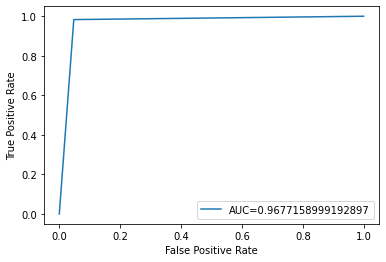

In [44]:
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, dtc_u_yhat) #get fpr and tpr for plotting the ROC curve
auc_dtc = roc_auc_score(y_test, dtc_u_yhat)
plt.plot(fpr_dtc, tpr_dtc, label = 'AUC='+str(auc_dtc))
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In this section, a baseline Decision Tree Classifier model was built and fit to evaluate classification performance for predicting instances of chronic kidney disease (CKD). The baseline model showed strong performance in its f1 score (at 99.1%) which already exceeded the optimized logistic regression model. The model performance was improved by 5-Fold Cross validation and hyperparameter optimization. The model f1 score improved from 99.1% to 100%. Ultimately, this is a strong model that performs well and, after optimization, doesn't produce any false negatives in the test dataset.

## 5. Random Forest Classifier
* ### Baseline Case: 
The following model is built with no optimization and will be used to compare to the model after optimization and K fold cross validation has been completed.

In [45]:
rfc = RandomForestClassifier().fit(x_train, y_train) #build a baseline rfc model and fit with training data
rfc_ytrain = rfc.predict(x_train) #predict on training
rfc_ytest = rfc.predict(x_test) #predict on test set
print(classification_report(y_test, rfc_ytest)) 
rfc_f1 = f1_score(y_test, rfc_ytest)
print('f1:', rfc_f1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        59

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

f1: 1.0


The base case of the Random Forest Classifier model has a F1 score on the test data of 100%. This already outperforms the logistic regression model discussed above, and is the best "out of the box" performer that was considered for this project. This makes sense because this is a non parametric model, which handles skewed data better than a parametric model and it is also an ensemble method, meaning that it takes multiple individual models and leverages them together to optimize the model's performance.

* ###  Optimization and Cross Validation:

Since the model already meets 100% for its f1 score (and all other metrics), the model does not need further optimization.

* ### Analysis of Results: Random Forest Classifier
First, let's examine the confusion matrix for the final model. 

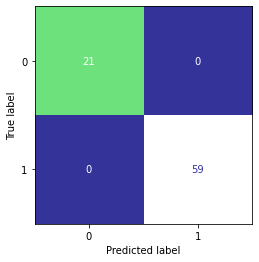

In [46]:
confusion_matrix_rfc = confusion_matrix(y_test, rfc_ytest)
cm_plot_rfc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc)
cm_plot_rfc.plot(cmap = 'terrain', colorbar =False)
plt.show()

As is evident, this model correctly classifies each instance in the test data set and has no false negatives or false positives. This is desirable, especially for a model used for medical purposes.

Text(0, 0.5, 'True Positive Rate')

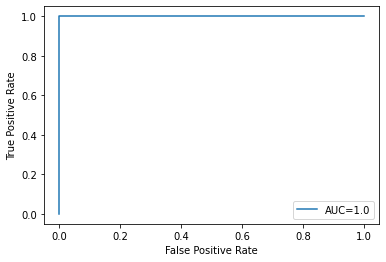

In [47]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc_ytest)
auc_rfc = roc_auc_score(y_test, rfc_ytest)
plt.plot(fpr_rfc, tpr_rfc, label = 'AUC='+str(auc_rfc))
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

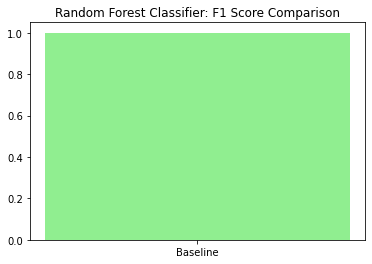

In [48]:
ml_models = ['Baseline']
f1_scores = [rfc_f1]
c = ['lightgreen']
plt.bar(ml_models, f1_scores, color = c)
plt.title('Random Forest Classifier: F1 Score Comparison')
plt.show()

In this section, a baseline random forest classifier (RFC) was built and fit to evaluate classification performance for predicting instances of chronic kidney disease (CKD). The baseline model had a 100% f1 score and accuracy score. The model did not undergo any additional hyperparameter optimization since this was not necessary. This model is an non parametric ensemble method, meaning that it is robust against any skew (seen in the histograms in the EDA section) and collinearity (in this data set there is only mild collinearity), which is possibly a factor in why the model did not need hyperparameter optimization. 

Ultimately, this is a strong model that performs well, and does not yield any false positives or false negatives in the test dataset. From a medical standpoint, this is good, since false negatives allow patients to remain undiagnosed and potentially risk dangerous health consequences.

## 6. Model Comparison
In this section, the models presented above will be compared and evaluated. The f1 scores for the baseline and optimized models will be presented and each correlation matrix will be displayed side by side to allow for close comparison. The f1 score was chosen since the data set is imbalanced and the confusion matrix is of interest since this is a medical diagnosis problem and we want the model to minimize the number of False Negatives.

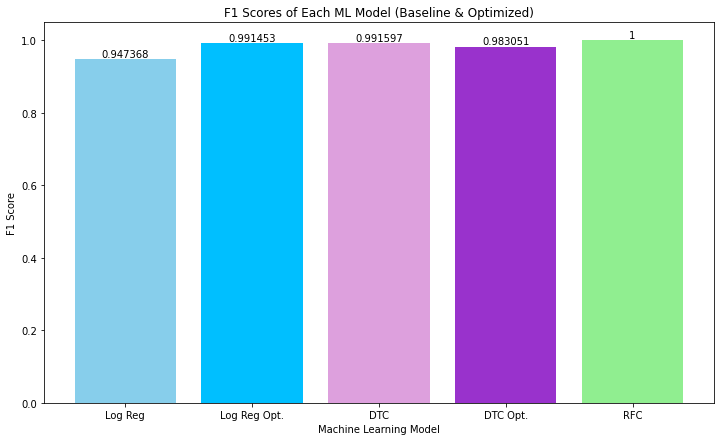

In [49]:
ml_models = ['Log Reg','Log Reg Opt.' ,'DTC', 'DTC Opt.','RFC']
f1_scores = [log_reg_f1, log_reg_f1_cv, dtc_f1, dtc_u_f1, rfc_f1] #compile the f1 score for each model
c = ['skyblue', 'deepskyblue', 'plum', 'darkorchid','lightgreen']
fig, ax = plt.subplots(figsize=(12,7))
bar_plot = ax.bar(ml_models, f1_scores, color = c) #plot each f1 score a specific color
ax.bar_label(bar_plot) #show the f1 score on the plot
plt.title('F1 Scores of Each ML Model (Baseline & Optimized)')
plt.ylabel('F1 Score')
plt.xlabel('Machine Learning Model')
plt.show()

The above plot shows a side-by-side comparison of each model both before and after optimization (if applicable). Based on the f1 score, the Random Forest Classifier (RFC) performs the best compared to all of the other ML models. Even without optimization, the RFC has the highest f1 score (100%). The RFC is a non parametric ensemble method, meaning it is less sensitive to even the mild collinearity and skew that is seen in our data set. This is a possible cause for it's high f1 score compared to the other models that were considered. The Decision Tree Classifier is a non parametric model, which is why the model outperforms the logistic regression, given that skewed data has greater influence on parametric models (where a certain form for the fit function is expected) than non parametric models (James et. al., 22).

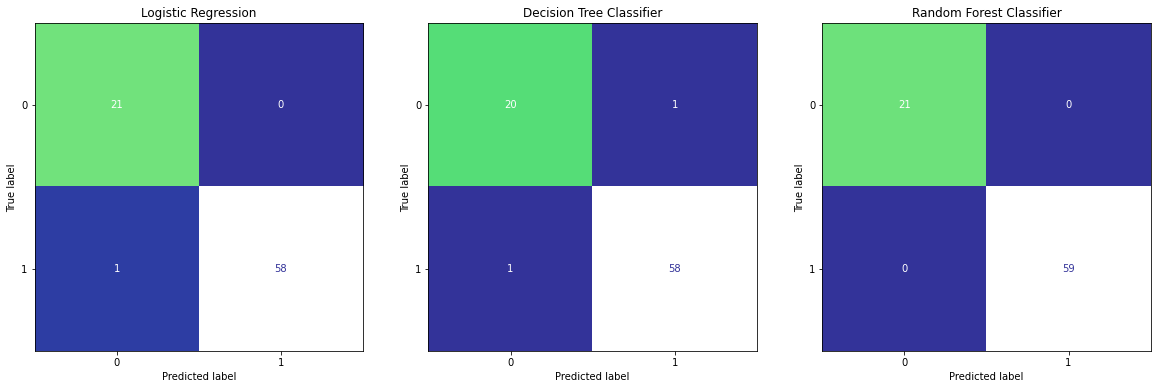

In [50]:
# Plotting the confusion matrix side by side for each of the models discussed above
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))
cm_plot_log_reg.plot(cmap = 'terrain', colorbar =False, ax =ax1)
ax1.title.set_text('Logistic Regression')


cm_plot_dtc.plot(cmap = 'terrain', colorbar =False, ax = ax2)
ax2.title.set_text('Decision Tree Classifier')

cm_plot_rfc.plot(cmap = 'terrain', colorbar =False, ax=ax3)
ax3.title.set_text('Random Forest Classifier')

plt.show()

The confusion matrices above show that the RFC (baseline) and the optimized Decision Tree Classifier (DTC) have the fewest instances of false negatives in the model. This is important for a medical application since it is not desirable to leave a patient undiagnosed if they do in fact have CKD. However, even the model with the worst performance still has only 1 false negative in the test data set.

Overall, the Random Forest Classifier (RFC) offers the best classification performance for the Chronic Kidney Disease prediction application and does not require additonal hyperparameter optimization. This model offers a viable solution to classifiying instances of Chronic Kidney Disease with a high f1 score (both precision and recall) as well as a zero false negative rate.

# **Discussion**
1. Lessons Learned
2. What didn't work?
3. Next Steps & Areas for Improvement
4. Final Thoughts

## 1. Lessons Learned
This project has given me the opportunity to explore the application of supervised machine learning techniques to real world problems. From this experience, I have several lessons learned and takeaways that I will carry forward in future ML applications and projects
* The data cleaning process tends to take the longest out of all sections in the project cycle. However, doing it correctly is critical for model training and ultimately answering the problem correctly and with confidence. 
* Data is messy and will not be perfect. Care and detail must be given to preparing it.
* EDA is an insightful process and the key takeaways from that section are carried forward to understanding which machine learning models should be used for the particular data set as well as why one model might outperform another.
* It is important to consider feature importance and hyperparameter optimization for each model (if possible). Doing so will greatly improve model performance and allow the machine learning engineer to achieve their goal.

## 2. What didn't work?
The main issue I encountered in the project related to the data cleaning and EDA portion of the project. The data set has numerous nulls that either needed to be imputed or features that needed to be removed. I wanted to ensure that I wasn't costing my model in terms of features that could influence the model classification accuracy so I spent time working in this section to make sure that I was removing only what absolutely needed to be removed. Furthermore, this data set exposed me to data set challenges that we hadn't directly encountered in the course, namely a dataset with mild collinearity as well as imbalanced classes and a skewed feature set. This exposed me to deepen my understanding on which machine learning models need to be used in this case. For example, I initially planned to use a KNN and SVM, however, upon discovering more about the data set in the EDA section I decided to switch to working with a Decision Tree Classifier and a Random Forest Classifier since these were the most pertinent to my data set needs. 

## 3. Next Steps & Areas for Improvement
This project was an excellent introduction to the CKD classification problem. A main area for improvement is additional datasets related to classfying CKD. Currently, this is one of the few datasets addresssing CKD and it is important to note that the dataset itself is rather small (400 observations) and contains numerous missing values. If additional datasets were made available, this problem could be studied with more observation instances and with less need to remove/impute features and possibly lose key information on influential features. 

Furthmore, I would want to build an Adaboost Classifier to compare the performance of the Random Forest with the Adaboost. I believe the reason the Random Forest performed so well was due to the fact that it is an ensemble method and it would be interesting to confirm that belief with further model building.


## 4. Final Thoughts
This project explored the problem of classifying instances of Chronic Kidney Disease based on features collected while each patient was in the hospital. The goal of the project was to apply a Supervised Machine Learning model to a binary classification problem for distinguishing between Chronic Kidney Disease and Not Chronic Kidney Disease. In order to acheive this goal, the dataset was cleaned, EDA was completed, and three different machine learning models were built, optimized, and trained. With optimization, each of the three models achived an f1 score greater than 99%. The optimal model for this classification was identified based on its F1 score and it's False Negative value. The optimal model was the Random Forest Classifier, with an f1 score of 100% and zero instances of false negatives in the test data set. Therefore, it is evident that machine learning models can be applied to solve the problem of predicting Chronic Kidney Disease.

# Sources:
1. Brownlee, J. (2021, January 4). Random oversampling and undersampling for imbalanced classification. Machine Learning Mastery. Retrieved August 6, 2022, from https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/#:~:text=Random%20oversampling%20involves%20randomly%20selecting,them%20from%20the%20training%20dataset. 
2. Centers for Disease Control and Prevention. (2022, February 28). Chronic kidney disease basics. Centers for Disease Control and Prevention. Retrieved August 6, 2022, from https://www.cdc.gov/kidneydisease/basics.html 
3. Detecting multicollinearity with VIF - python. GeeksforGeeks. (2020, August 29). Retrieved August 6, 2022, from https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
4. Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of
    Information and Computer Science.
5. Iqbal, M. (2017, April 13). Chronic kidney disease dataset. Kaggle. Retrieved August 6, 2022, from https://www.kaggle.com/datasets/mansoordaku/ckdisease 
6. James, G., Hastie, T. J., Tibshirani, R., Witten, D. (2021). An Introduction to Statistical Learning: With Applications in R. Springer. 
7. Nighania, K. (2019, January 30). Various ways to evaluate a machine learning models performance. Medium. Retrieved August 6, 2022, from https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15 
8. U.S. Department of Health and Human Services. (n.d.). Chronic kidney disease (CKD). National Institute of Diabetes and Digestive and Kidney Diseases. Retrieved August 6, 2022, from https://www.niddk.nih.gov/health-information/kidney-disease/chronic-kidney-disease-ckd#:~:text=Chronic%20kidney%20disease%20(CKD)%20means,family%20history%20of%20kidney%20failure.


### Extra Python Packages (if not standard)
1. https://pypi.org/project/missingno/ (Missing Number package for data visualization)
2. http://scikit-learn.org/stable/about.html (Scikit learn for model building)
